#                 Business Case : Aerofit - Descriptive Statistics & Probability

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")

## Analysing Basic Metrics

#### Shape of data

In [3]:
df.shape

(180, 9)

In [4]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

#### Datatypes of Columns

In [5]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [6]:
df.index

RangeIndex(start=0, stop=180, step=1)

In [7]:
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [8]:
df.tail(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
170,KP781,31,Male,16,Partnered,6,5,89641,260
171,KP781,33,Female,18,Partnered,4,5,95866,200
172,KP781,34,Male,16,Single,5,5,92131,150
173,KP781,35,Male,16,Partnered,4,5,92131,360
174,KP781,38,Male,18,Partnered,5,5,104581,150
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


## Missing Value Detection 

In [9]:
np.any(df.isna())

False

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


 - It can be clearly seen from the above that the DataFrame does not contain any missing value.   

#### Statistical Summary

In [11]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [12]:
df.describe(include = object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


## Value counts and unique attributes

In [13]:
prod_counts = df['Product'].value_counts()
prod_counts

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [14]:
gender_counts = df['Gender'].value_counts()
gender_counts

Male      104
Female     76
Name: Gender, dtype: int64

In [15]:
marital_status_counts = df['MaritalStatus'].value_counts()
marital_status_counts

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [16]:
fitness_counts = df['Fitness'].value_counts()
fitness_counts

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [17]:
usage_counts = df['Usage'].value_counts()
usage_counts

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [18]:
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

[]

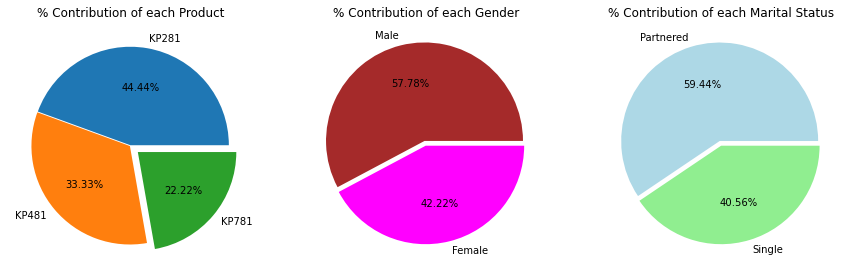

In [19]:
prod_dist = np.round(df['Product'].value_counts(normalize = True) * 100, 2).to_frame()
plt.figure(figsize = (15, 30))
plt.subplot(1, 3, 1)
plt.title('% Contribution of each Product')
plt.pie(x = prod_dist['Product'], explode = [0.005, 0.005, 0.1], labels = prod_dist.index, autopct = '%.2f%%')


gender_dist = (np.round(df['Gender'].value_counts(normalize = True) * 100, 2)).to_frame()
plt.subplot(1, 3, 2)
plt.title('% Contribution of each Gender')
plt.pie(x = gender_dist['Gender'], explode = [0.05, 0], 
        labels = gender_dist.index, autopct = '%.2f%%', colors = ['brown', 'magenta'])


marital_status_dist = (np.round(df['MaritalStatus'].value_counts(normalize = True) * 100, 2)).to_frame()
plt.subplot(1, 3, 3)
plt.title('% Contribution of each Marital Status')
plt.pie(x = marital_status_dist['MaritalStatus'], explode = [0.05, 0], 
        labels = marital_status_dist.index, autopct = '%.2f%%', colors = ['lightblue', 'lightgreen'])
plt.plot()

## Univariate Analysis 

### How are the ages of the Aerofit Customers distributed ?

[]

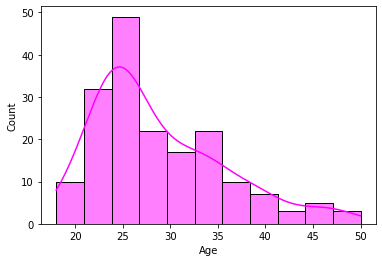

In [20]:
plt.figure()
sns.histplot(data = df, x = 'Age', kde = True, color = 'magenta')
plt.plot()

 - Most of the customers (more than 80% of the total) are aged between 20 and 30 years.
 - Less than 10% customers are aged 40 years and above.

##### Detecting outliers in age data for aerofit customers

[]

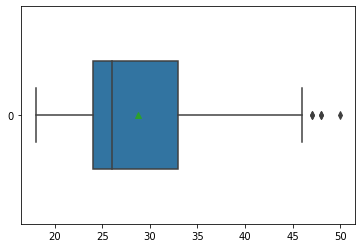

In [21]:
sns.boxplot(data = df['Age'], width = 0.5, orient = 'h', showmeans = True)
plt.plot()

##### Sample Calculation

In [22]:
result = df[(df["Age"] >= 20) & (df['Age'] <= 35)]['Product'].count() / len(df) * 100
"%% of customers whose age is between 20 and 35 is %.2f%%"%(result)

'% of customers whose age is between 20 and 35 is 81.67%'

In [23]:
data = df['Age']
print('Mean : ', data.mean())
print('Median : ', data.median())
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("1st Quartile : ", q1)
print("3rd Quartile : ", q3)
iqr = q3 - q1
print('Innerquartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper Bound : ", upper)
print('Lower Bound : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", sorted(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)

Mean :  28.788888888888888
Median :  26.0
1st Quartile :  24.0
3rd Quartile :  33.0
Innerquartile Range :  9.0
Upper Bound :  46.5
Lower Bound :  10.5
Outliers :  [47, 47, 48, 48, 50]
No of Outliers :  5


##### Based on the above obtained values, converting age column into bins :

In [24]:
def age_partitions(x):
    if x <= 24:
        return '<= 24 '
    elif 25 < x <= 33:
        return '25 - 33'
    elif 34 < x <= 46:
        return '34 - 46'
    else:
        return '> 46'
df['age_bins'] = df['Age'].apply(age_partitions)
df['age_bins'].loc[np.random.randint(0, 180, 10)]

157    25 - 33
6       <= 24 
53     25 - 33
159    25 - 33
162    25 - 33
173    34 - 46
9       <= 24 
27        > 46
41     25 - 33
124    25 - 33
Name: age_bins, dtype: object

### How is the annual income of the Aerofit Customers distributed ?

[]

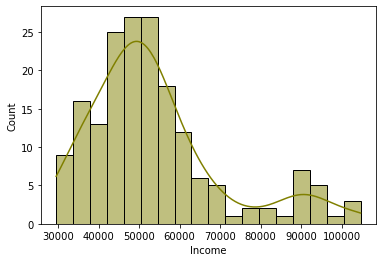

In [25]:
plt.figure()
sns.histplot(data = df, x = 'Income', kde = True, bins = 18, color = 'olive')
plt.plot()

 - Majority of the customers earn in between 35000 and 60000 dollars annually.
 - 80 % of the customers annual salary is less than 65000$.

##### Detecting outliers in annual income data of aerofit customers 

[]

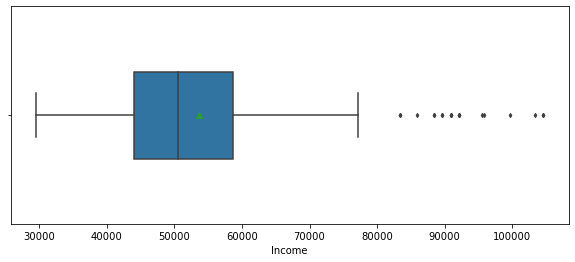

In [26]:
plt.figure(figsize = (10, 4))
sns.boxplot(data = df, x = 'Income', width = 0.4, orient = 'h', showmeans = True, fliersize = 3)
plt.plot()

##### Sample Calculation : 

In [27]:
data = df['Income']
print('Mean : ', data.mean())
print('Median : ', data.median())
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("1st Quartile : ", q1)
print("3rd Quartile : ", q3)
iqr = q3 - q1
print('Innerquartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper Bound : ", upper)
print('Lower Bound : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", sorted(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)

Mean :  53719.57777777778
Median :  50596.5
1st Quartile :  44058.75
3rd Quartile :  58668.0
Innerquartile Range :  14609.25
Upper Bound :  80581.875
Lower Bound :  22144.875
Outliers :  [83416, 83416, 85906, 88396, 88396, 89641, 89641, 90886, 90886, 90886, 92131, 92131, 92131, 95508, 95866, 99601, 103336, 104581, 104581]
No of Outliers :  19


##### Based on the above obtained values, converting age column into bins :

In [28]:
def income_partitions(x):
    if x < 45000:
        return '< 45k '
    elif 45000 <= x < 60000:
        return '45k - 60k'
    elif 60000 <= x < 80000:
        return '60k - 80k'
    else:
        return '> 80k'
df['income_bins'] = df['Income'].apply(income_partitions)
df['income_bins'].loc[np.random.randint(0, 180, 10)]

125    60k - 80k
82        < 45k 
143    45k - 60k
20        < 45k 
140    45k - 60k
166        > 80k
112    45k - 60k
177        > 80k
128    45k - 60k
46     45k - 60k
Name: income_bins, dtype: object

### How is the self rated fitness scale of Aerofit Treadmill customers distributed ?

[]

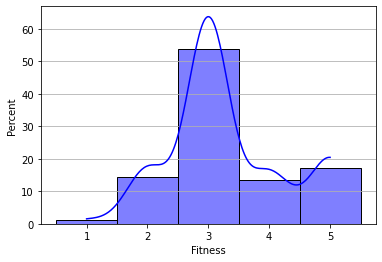

In [29]:
plt.figure()
sns.histplot(data = df, x = 'Fitness', discrete = True, kde = True, stat = 'percent', color = 'blue')
plt.yticks(np.arange(0, 101, 10))
plt.grid(axis = 'y')
plt.plot()

 - More than 50% customers rate themselves 3 out of 5 in self rated fitness scale 
 - Around 30% of the total customers rate themselves 4 or above in the fitness scale.
 - Around 70 % of the aerofit customers rate themselves 3 or less than 3 in fitness scale.
 - Less than 20 % of aerofit customers have excellent shape.

### How is the Education (in years) of Aerofit Treadmill customers distributed ?  

[]

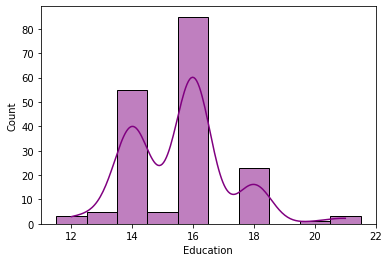

In [30]:
sns.histplot(data = df, x = 'Education', discrete = True, kde = True, color = 'purple')
plt.plot()

 - It can be evidently observed in the above plot that most customers have 16 years of Education, followed by 14 years and 18 years.

### How is the number of times the Aerofit Treadmill customers plan to use the treadmill each week distributed ?

[]

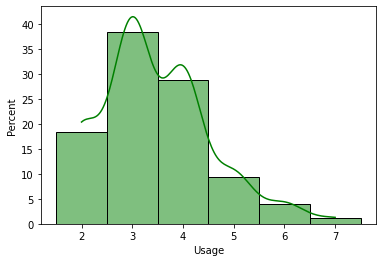

In [31]:
sns.histplot(data = df, x = 'Usage', kde = True, stat = 'percent', discrete = True, color = 'green')
plt.plot()

 - Based on the above plot, it appears that most customers use treadmills on alternate days.

 - There are about 40% of customers who use treadmills three days a week and about 30% who use them four days a week.

### Count of customers vs the expected number of miles customers run / walk each week  

[]

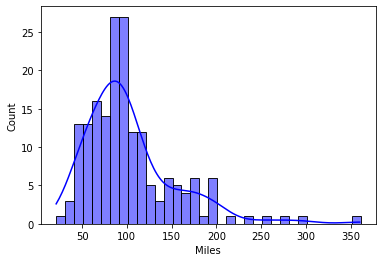

In [32]:
plt.figure()
sns.histplot(data = df, x = 'Miles', kde = True, binwidth = 10, color = 'blue')
plt.plot()

 -  On the above plot, we can see that most customers expect to walk or run between 40 and 120 miles a week.   




## Bivariate Analysis

[]

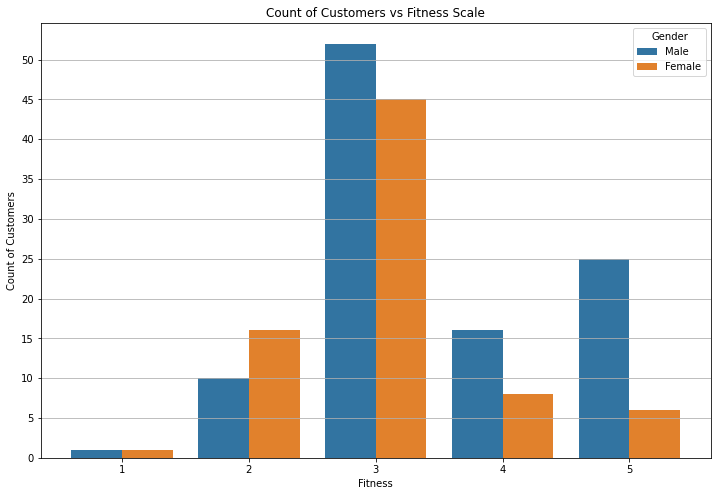

In [33]:
plt.figure(figsize = (12, 8))
plt.title('Count of Customers vs Fitness Scale')
sns.countplot(data = df, x = 'Fitness', hue = 'Gender')                    
plt.grid(axis = 'y')
plt.yticks(np.arange(0, 60, 5))
plt.ylabel('Count of Customers')
plt.plot()

 - Most of the males and females (more than 50% customers) find themselves in the fitness scale 3 .
 - There is a slight difference in the number of males and females in all the fitness scales except for high fitness scales.
 - For fitness scales 4 and 5, there are roughly 3 times more males than females.

[]

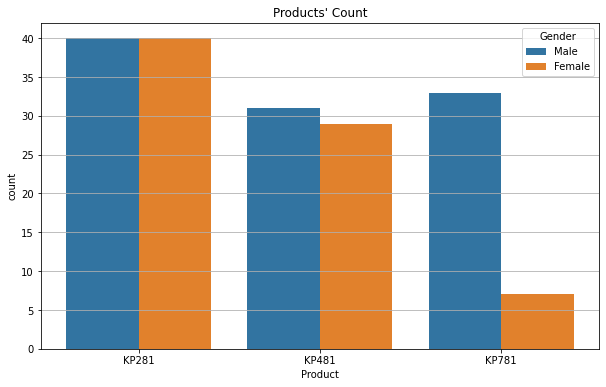

In [34]:
plt.figure(figsize = (10, 6))
plt.title("Products' Count")
sns.countplot(data = df, x = 'Product', hue = 'Gender')
plt.grid(axis = 'y')
plt.plot()

 - It can be observed that most people buy the entry-level treadmills.
 - The number of males buying the treadmills having advanced features is around 5 times the number of females buying the same.

[]

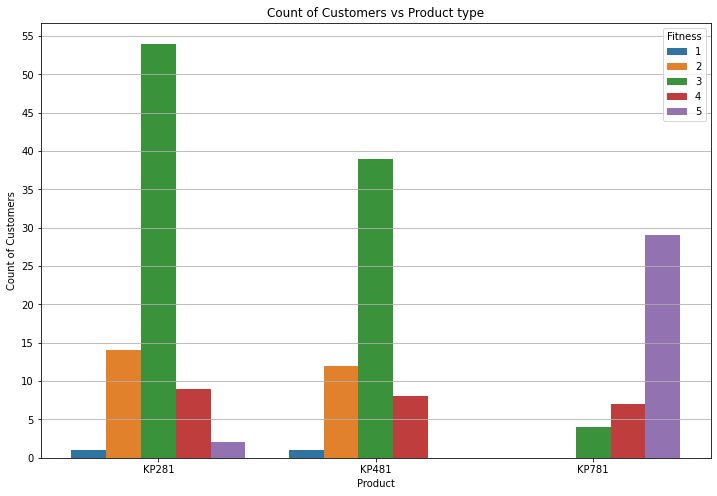

In [35]:
# For Male, different product categories and 
plt.figure(figsize = (12, 8))
plt.title("Count of Customers vs Product type")
plt.yticks(np.arange(0, 60, 5))
sns.countplot(data = df, x = 'Product', hue = 'Fitness')
plt.ylabel('Count of Customers')
plt.grid(axis = 'y')
plt.plot()

 - The customers who rate themselses 3 out of 5 in self rated fitness scale are more likely to invest in the entry-level treadmills or treadmills for mid-level runners i.e., KP281 and KP481 respectively and they are more unlikey to buy the treadmill which has advanced features i.e., KP781.

 - The treadmill having advanced features are mostly used by the people with high fitness levels.
 - The customers who rate themselves 3 or below in the self-rated fitness scale do not buy KP781.

[]

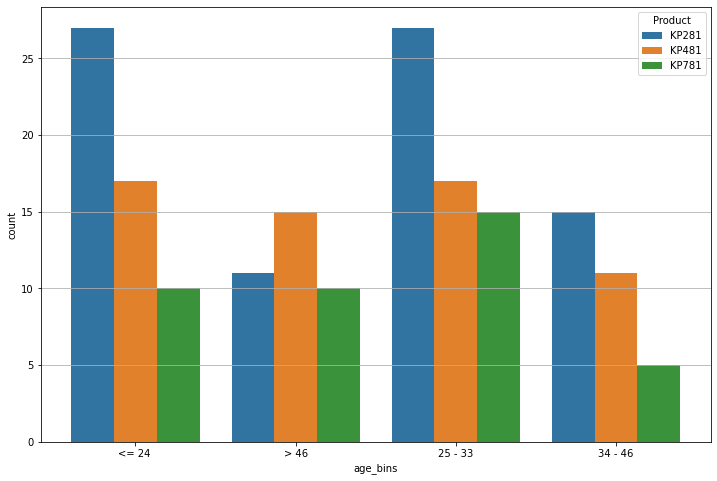

In [36]:
plt.figure(figsize = (12, 8))
sns.countplot(data = df, x = 'age_bins', hue = 'Product')
plt.grid(axis = 'y')
plt.plot()

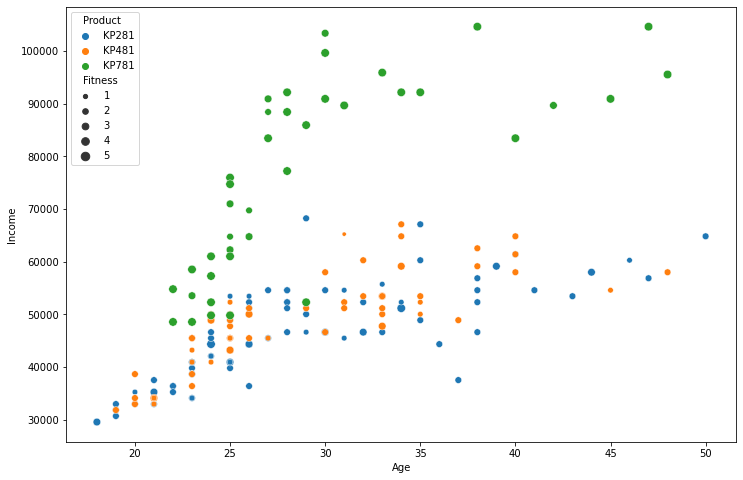

In [37]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x= 'Age', y = 'Income', hue = 'Product', size = 'Fitness')
plt.show()

 - The customers having high annual income and high fitness scale generally buys KP781.  
 - The customers having low fitness scale or low annual income generally buy KP281 and KP481.

### What is the age range of the customers who purchase a specific type of product?

[]

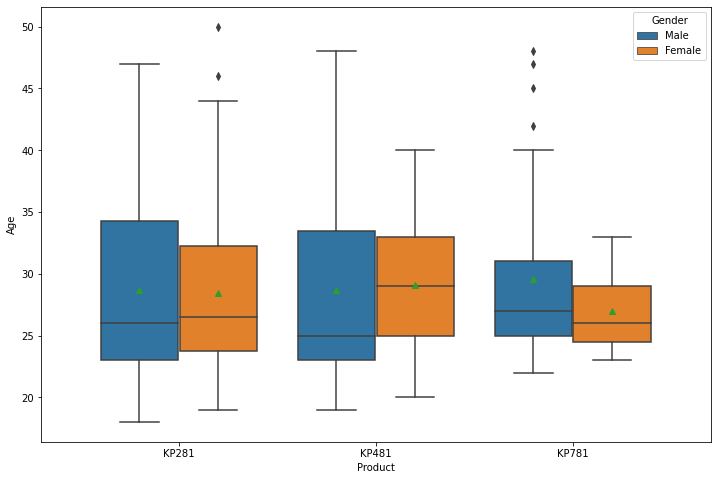

In [38]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'Product', y = 'Age', hue = 'Gender', showmeans = True)
plt.plot()

 - Most customers were in their 20s or 30s.
 - The age range of KP781 customers is smaller than the age range of the customers who bought other two products.
 - There is a significant difference in the median age of males and females who bought KP481.
 - For any product, the age range for males is higher than that of female. The range difference is significant for the product KP781. 

##### Sample calculation to detect outliers in the age of males who bought KP781 

In [39]:
data = df.loc[(df['Product'] == 'KP781') & (df['Gender'] == 'Male'), 'Age']
print('Mean : ', data.mean())
print('Median : ', data.median())
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("Quartile 1 : ", q1)
print("Quartile 3 : ", q3)
iqr = q3 - q1
print('Inner Quartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper : ", upper)
print('Lower : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", list(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)

Mean :  29.545454545454547
Median :  27.0
Quartile 1 :  25.0
Quartile 3 :  31.0
Inner Quartile Range :  6.0
Upper :  40.0
Lower :  16.0
Outliers :  [42, 45, 47, 48]
No of Outliers :  4


 - We can clearly see in the boxplot above the sample calculation that we have exactly 4 outliers in the data of age of the males who bought KP781 treadmill.

### What is the income range of the customers who purchase a specific type of product?

[]

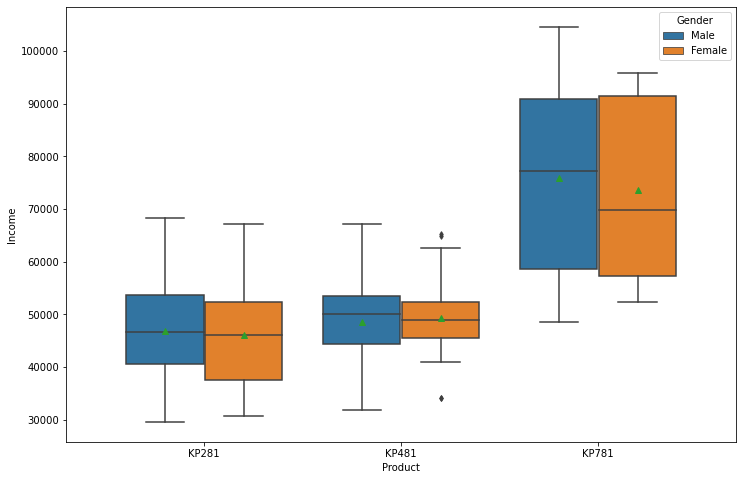

In [40]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = 'Product', y = 'Income', hue = 'Gender', showmeans = True, fliersize = 4)
plt.plot()

 - The median income of customers who bought KP781 is much higher than that of the customers who bought other two products.
 - The range of income for customers buying KP781 is much higher than the same for customers buying KP281 and KP481.

##### Sample calculation to detect outliers in the income of females who bought KP481  

In [41]:
data = df.loc[(df['Product'] == 'KP481') & (df['Gender'] == 'Female'), 'Income']
print('Mean : ', data.mean())
print('Median : ', data.median())
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("Quartile 1 : ", q1)
print("Quartile 3 : ", q3)
iqr = q3 - q1
print('Inner Quartile Range : ', iqr)
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper : ", upper)
print('Lower : ', lower)
outliers = data[(data > upper) | (data < lower)]
print("Outliers : ", list(outliers))
len_outliers = len((data[(data > upper) | (data < lower)]))
print('No of Outliers : ', len_outliers)

Mean :  49336.44827586207
Median :  48891.0
Quartile 1 :  45480.0
Quartile 3 :  52302.0
Inner Quartile Range :  6822.0
Upper :  62535.0
Lower :  35247.0
Outliers :  [34110, 34110, 65220, 64809]
No of Outliers :  4


[]

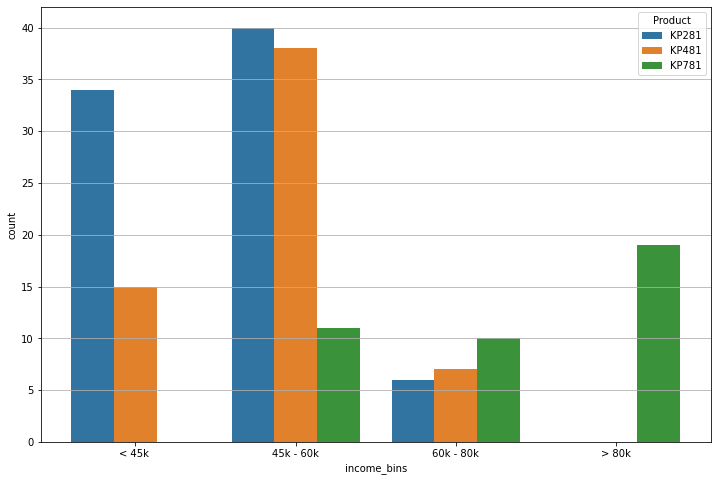

In [42]:
plt.figure(figsize = (12, 8))
sns.countplot(data = df, x = 'income_bins', hue = 'Product')
plt.grid(axis = 'y')
plt.plot()

 - The customers with high annual salary (60k and above) are more likely to buy KP781.
 - The customers with annual salary < 60k are more likely to buy KP281 and KP481.

#### Coorelation between measurable quantities 

[]

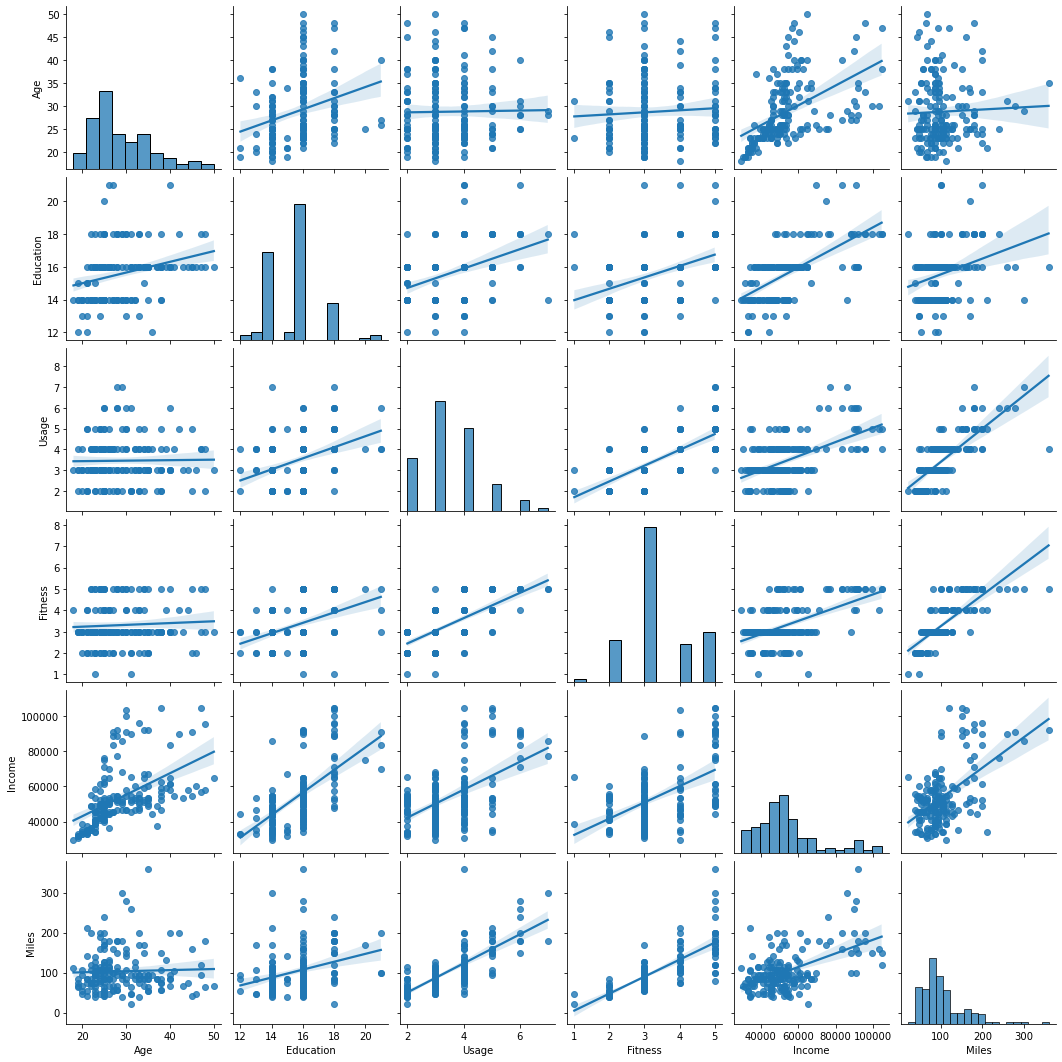

In [43]:
sns.pairplot(data = df, kind = 'reg') 
plt.plot()

In [44]:
df_corr = df.corr()
df_corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


[]

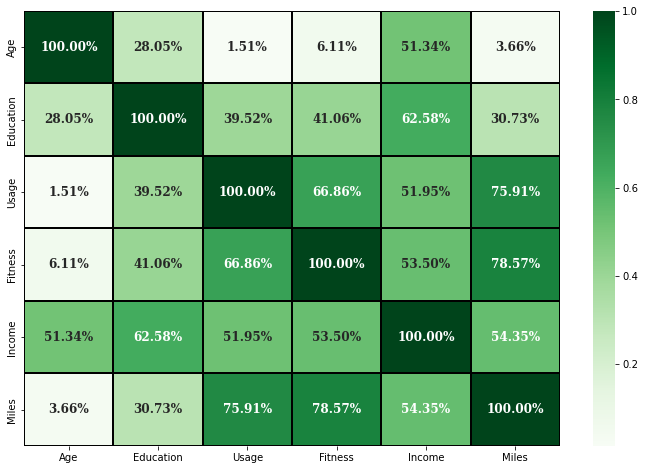

In [45]:
plt.figure(figsize = (12, 8))
sns.heatmap(data = df_corr, 
            annot = True, 
            fmt = '.2%', 
            cmap='Greens', 
            linewidth = 2, 
            linecolor = 'black', 
            annot_kws = {'fontsize' : 'large',
                        'fontfamily' : 'serif',
                        'fontweight': 'bold'})           
plt.plot()

 - The customer with high fitness scale is more likely to run or walk more miles.
 - The customer who expects to use the treadmill more times in a week generally expects to walk or run more miles in the week.
 - The customer who have a high fitness scale generally uses the treadmill more frequently in a week.

### What is the product buying behaviors of both the genders ?

In [84]:
print(pd.crosstab(index = df['Product'], columns = df['Gender'], margins = True))
print()
print('-' * 26)
print()
print("Product-wise normalization : ")
print(np.round(pd.crosstab(index = df['Product'], columns = df['Gender'], normalize = 'index') * 100, 2))
print()
print('-' * 23)
print()
print("Gender-wise normalization : ")
print(np.round(pd.crosstab(index = df['Product'], columns = df['Gender'], normalize = 'columns') * 100, 2))

Gender   Female  Male  All
Product                   
KP281        40    40   80
KP481        29    31   60
KP781         7    33   40
All          76   104  180

--------------------------

Product-wise normalization : 
Gender   Female   Male
Product               
KP281     50.00  50.00
KP481     48.33  51.67
KP781     17.50  82.50

-----------------------

Gender-wise normalization : 
Gender   Female   Male
Product               
KP281     52.63  38.46
KP481     38.16  29.81
KP781      9.21  31.73


 - Customers who bought KP781, 82.5% of them are males rest are females.
 
 
 - Among all female customers, only 9.21 % buy KP781. Females mostly buy products KP281 or KP481.

##### What is the probability of buying a specific product provided the customer is of specific gender ?

In [47]:
products = df['Product'].unique()
genders = df['Gender'].unique()
for i in genders:
    for j in products:
        prob = len(df[(df['Gender'] == i) & (df['Product'] == j)]) / len(df[df['Gender'] == i])
        prob = np.round(prob * 100, 2)
        print("Probability of buying '{}' provided the customer is {} is {}% ".format(j, i, prob))
        print()

Probability of buying 'KP281' provided the customer is Male is 38.46% 

Probability of buying 'KP481' provided the customer is Male is 29.81% 

Probability of buying 'KP781' provided the customer is Male is 31.73% 

Probability of buying 'KP281' provided the customer is Female is 52.63% 

Probability of buying 'KP481' provided the customer is Female is 38.16% 

Probability of buying 'KP781' provided the customer is Female is 9.21% 



##### What is the probability of that the customer is of specific gender provided specific product is bought ? 

In [48]:
products = df['Product'].unique()
genders = df['Gender'].unique()
for i in genders:
    for j in products:
        prob = len(df[(df['Gender'] == i) & (df['Product'] == j)]) / len(df[df['Product'] == j])
        prob = np.round(prob * 100, 2)
        print("Probability that the customer is {} provided {} was bought is {}% ".format(i, j, prob))
        print()

Probability that the customer is Male provided KP281 was bought is 50.0% 

Probability that the customer is Male provided KP481 was bought is 51.67% 

Probability that the customer is Male provided KP781 was bought is 82.5% 

Probability that the customer is Female provided KP281 was bought is 50.0% 

Probability that the customer is Female provided KP481 was bought is 48.33% 

Probability that the customer is Female provided KP781 was bought is 17.5% 



### What is the product buying behaviors of both the Marital Statuses ?

In [85]:
print(pd.crosstab(index = df['Product'], columns = df['MaritalStatus'], margins = True))
print()
print('-' * 37)
print()
print("Product-wise normalization : ")
print(np.round(pd.crosstab(index = df['Product'], columns = df['MaritalStatus'], normalize = 'index') * 100, 2))
print()
print('-' * 33)
print()
print("Marital Status-wise normalization : ")
print(np.round(pd.crosstab(index = df['Product'], columns = df['MaritalStatus'], normalize = 'columns') * 100, 2))

MaritalStatus  Partnered  Single  All
Product                              
KP281                 48      32   80
KP481                 36      24   60
KP781                 23      17   40
All                  107      73  180

-------------------------------------

Product-wise normalization : 
MaritalStatus  Partnered  Single
Product                         
KP281               60.0    40.0
KP481               60.0    40.0
KP781               57.5    42.5

---------------------------------

Marital Status-wise normalization : 
MaritalStatus  Partnered  Single
Product                         
KP281              44.86   43.84
KP481              33.64   32.88
KP781              21.50   23.29


##### What is the probability of buying a specific product provided the customer is of specific marital status ?

In [50]:
products = df['Product'].unique()
statuses = df['MaritalStatus'].unique()
for i in statuses:
    if i != 'Single':
        print('-' * 76)
    for j in products:
        prob = len(df[(df['MaritalStatus'] == i) & (df['Product'] == j)]) / len(df[df['MaritalStatus'] == i])
        prob = np.round(prob * 100, 2)
        print("Probability of buying '{}' provided the customer is '{}' is {}% ".format(j, i, prob))
        print()

Probability of buying 'KP281' provided the customer is 'Single' is 43.84% 

Probability of buying 'KP481' provided the customer is 'Single' is 32.88% 

Probability of buying 'KP781' provided the customer is 'Single' is 23.29% 

----------------------------------------------------------------------------
Probability of buying 'KP281' provided the customer is 'Partnered' is 44.86% 

Probability of buying 'KP481' provided the customer is 'Partnered' is 33.64% 

Probability of buying 'KP781' provided the customer is 'Partnered' is 21.5% 



##### What is the probability of that the customer is of specific Marital Status provided specific product is bought ? 

In [51]:
products = df['Product'].unique()
statuses = df['MaritalStatus'].unique()
for i in statuses:
    if i != 'Single':
        print('-' * 82)
    for j in products:
        prob = len(df[(df['MaritalStatus'] == i) & (df['Product'] == j)]) / len(df[df['Product'] == j])
        prob = np.round(prob * 100, 2)
        print("Probability that the customer is '{}' provided '{}' was bought is {}% ".format(i, j, prob))
        print()

Probability that the customer is 'Single' provided 'KP281' was bought is 40.0% 

Probability that the customer is 'Single' provided 'KP481' was bought is 40.0% 

Probability that the customer is 'Single' provided 'KP781' was bought is 42.5% 

----------------------------------------------------------------------------------
Probability that the customer is 'Partnered' provided 'KP281' was bought is 60.0% 

Probability that the customer is 'Partnered' provided 'KP481' was bought is 60.0% 

Probability that the customer is 'Partnered' provided 'KP781' was bought is 57.5% 



### What is the product buying behaviors of customers with different fitness levels ?

In [86]:
print(pd.crosstab(index = df['Product'], columns = df['Fitness'], margins = True))
print()
print('-' * 40)
print()
print("Product-wise normalization : ")
print(np.round(pd.crosstab(index = df['Product'], columns = df['Fitness'], normalize = 'index') * 100, 2))
print()
print('-' * 40)
print()
print("Fitness Scale-wise normalization : ")
print(np.round(pd.crosstab(index = df['Product'], columns = df['Fitness'], normalize = 'columns') * 100, 2))

Fitness  1   2   3   4   5  All
Product                        
KP281    1  14  54   9   2   80
KP481    1  12  39   8   0   60
KP781    0   0   4   7  29   40
All      2  26  97  24  31  180

----------------------------------------

Product-wise normalization : 
Fitness     1     2     3      4     5
Product                               
KP281    1.25  17.5  67.5  11.25   2.5
KP481    1.67  20.0  65.0  13.33   0.0
KP781    0.00   0.0  10.0  17.50  72.5

----------------------------------------

Fitness Scale-wise normalization : 
Fitness     1      2      3      4      5
Product                                  
KP281    50.0  53.85  55.67  37.50   6.45
KP481    50.0  46.15  40.21  33.33   0.00
KP781     0.0   0.00   4.12  29.17  93.55


 - Number of customers who bought products KP281, KP481 and KP781 are in ratio 4 : 3 : 2. That means for every 9 customers, 4 customers bought KP281, 3 bought KP481 and 2 bought KP781.
 
 
 - Among all the customers who bought KP281, 96.25 % of them had fitness scales of 2, 3 or 4. Only 2.5 % of them had excellent body shape.    
 - Among all the customers who bought KP781, 90 % of them had fitness scales 4 or 5. Only 10 % of them had average body shape.
 
 
 - Among all the customers who had excellent body shape (fitness scale 5), 93.55 % of them bought product KP781 while the rest buy KP281. 
 - All the customers in each fitness levels 1 and 2 (i.e., customers having poor body shape) either bought product KP281 or KP481. None of them bought the treadmill having advanced features i.e., KP781. 

##### What is the probability of buying a specific product provided the customer has specific fitness scale  ?

In [53]:
products = df['Product'].unique()
scales = sorted(df['Fitness'].unique())
for i in scales:
    if i != 1:
        print('-' * 88)
    for j in products:
        prob = len(df[(df['Fitness'] == i) & (df['Product'] == j)]) / len(df[df['Fitness'] == i])
        prob = np.round(prob * 100, 2)
        print("Probability of buying '{}' provided the customer has the fitness scale '{}' is {}% ".format(j, i, prob))
        print()

Probability of buying 'KP281' provided the customer has the fitness scale '1' is 50.0% 

Probability of buying 'KP481' provided the customer has the fitness scale '1' is 50.0% 

Probability of buying 'KP781' provided the customer has the fitness scale '1' is 0.0% 

----------------------------------------------------------------------------------------
Probability of buying 'KP281' provided the customer has the fitness scale '2' is 53.85% 

Probability of buying 'KP481' provided the customer has the fitness scale '2' is 46.15% 

Probability of buying 'KP781' provided the customer has the fitness scale '2' is 0.0% 

----------------------------------------------------------------------------------------
Probability of buying 'KP281' provided the customer has the fitness scale '3' is 55.67% 

Probability of buying 'KP481' provided the customer has the fitness scale '3' is 40.21% 

Probability of buying 'KP781' provided the customer has the fitness scale '3' is 4.12% 

-------------------

##### What is the probability of that the customer has a specific fitness scale provided specific product was bought ? 

In [54]:
products = df['Product'].unique()
scales = sorted(df['Fitness'].unique())
for i in scales:
    if i != 1:
        print('-' * 94)
    for j in products:
        prob = len(df[(df['Fitness'] == i) & (df['Product'] == j)]) / len(df[df['Product'] == j])
        prob = np.round(prob * 100, 2)
        print("Probability that the customer has a fitness scale of '{}' provided '{}' was bought is {}% ".format(i, j, prob))
        print()

Probability that the customer has a fitness scale of '1' provided 'KP281' was bought is 1.25% 

Probability that the customer has a fitness scale of '1' provided 'KP481' was bought is 1.67% 

Probability that the customer has a fitness scale of '1' provided 'KP781' was bought is 0.0% 

----------------------------------------------------------------------------------------------
Probability that the customer has a fitness scale of '2' provided 'KP281' was bought is 17.5% 

Probability that the customer has a fitness scale of '2' provided 'KP481' was bought is 20.0% 

Probability that the customer has a fitness scale of '2' provided 'KP781' was bought is 0.0% 

----------------------------------------------------------------------------------------------
Probability that the customer has a fitness scale of '3' provided 'KP281' was bought is 67.5% 

Probability that the customer has a fitness scale of '3' provided 'KP481' was bought is 65.0% 

Probability that the customer has a fitness 

### What is the relation between Marital Statuses and fitness levels of the Aerofit Customers?

In [55]:
print(pd.crosstab(index = df['MaritalStatus'], columns = df['Fitness'], margins = True))
print()
print('-' * 48)
print('Marital Status wise normalization : ')
print()
print(np.round(pd.crosstab(index = df['MaritalStatus'], columns = df['Fitness'], normalize = 'index') * 100, 2))
print()
print("-" * 48)
print('Fitness levels wise normalization : ')
print()
print(np.round(pd.crosstab(index = df['MaritalStatus'], columns = df['Fitness'], normalize = 'columns') * 100, 2))


Fitness        1   2   3   4   5  All
MaritalStatus                        
Partnered      1  18  57  13  18  107
Single         1   8  40  11  13   73
All            2  26  97  24  31  180

------------------------------------------------
Marital Status wise normalization : 

Fitness           1      2      3      4      5
MaritalStatus                                  
Partnered      0.93  16.82  53.27  12.15  16.82
Single         1.37  10.96  54.79  15.07  17.81

------------------------------------------------
Fitness levels wise normalization : 

Fitness           1      2      3      4      5
MaritalStatus                                  
Partnered      50.0  69.23  58.76  54.17  58.06
Single         50.0  30.77  41.24  45.83  41.94


 - Majority of customers (i.e., greater than 50%) in each marital statuses had fitness scale 3.
 - Majority of customers (i.e., greater than 50%) in each of fitness scales 2, 3, 4 and 5 were partnered.(Since there are significantly higher number of customers who were partnered than single)

### What is the relation between Incomes and Products bought by the Aerofit Customers?

In [56]:
print(pd.crosstab(index = df['Product'], columns = df['income_bins'], margins = True))
print()
print('-' * 54)
print('Product wise normalization : ')
print()
print(np.round(pd.crosstab(index = df['Product'], columns = df['income_bins'], normalize = 'index') * 100, 2))
print()
print("-" * 48)
print('Income-bins wise normalization :')
print()
print(np.round(pd.crosstab(index = df['Product'], columns = df['income_bins'], normalize = 'columns') * 100, 2))

income_bins  45k - 60k  60k - 80k  < 45k   > 80k  All
Product                                              
KP281               40          6      34      0   80
KP481               38          7      15      0   60
KP781               11         10       0     19   40
All                 89         23      49     19  180

------------------------------------------------------
Product wise normalization : 

income_bins  45k - 60k  60k - 80k  < 45k   > 80k
Product                                         
KP281            50.00       7.50    42.5    0.0
KP481            63.33      11.67    25.0    0.0
KP781            27.50      25.00     0.0   47.5

------------------------------------------------
Income-bins wise normalization :

income_bins  45k - 60k  60k - 80k  < 45k   > 80k
Product                                         
KP281            44.94      26.09   69.39    0.0
KP481            42.70      30.43   30.61    0.0
KP781            12.36      43.48    0.00  100.0


##### What is the probability of buying a specific product provided the customer's annual income lies in a specific income range  ?

In [57]:
products = df['Product'].unique()
incomes = sorted(df['income_bins'].unique())
for i in incomes:
    if i != '45k - 60k':
        print('-' * 105)
    for j in products:
        prob = len(df[(df['income_bins'] == i) & (df['Product'] == j)]) / len(df[df['income_bins'] == i])
        prob = np.round(prob * 100, 2)
        print("Probability of buying '{}' provided the customer has the annual income in range '{}' is {}% ".format(j, i, prob))
        print()

Probability of buying 'KP281' provided the customer has the annual income in range '45k - 60k' is 44.94% 

Probability of buying 'KP481' provided the customer has the annual income in range '45k - 60k' is 42.7% 

Probability of buying 'KP781' provided the customer has the annual income in range '45k - 60k' is 12.36% 

---------------------------------------------------------------------------------------------------------
Probability of buying 'KP281' provided the customer has the annual income in range '60k - 80k' is 26.09% 

Probability of buying 'KP481' provided the customer has the annual income in range '60k - 80k' is 30.43% 

Probability of buying 'KP781' provided the customer has the annual income in range '60k - 80k' is 43.48% 

---------------------------------------------------------------------------------------------------------
Probability of buying 'KP281' provided the customer has the annual income in range '< 45k ' is 69.39% 

Probability of buying 'KP481' provided the 

##### What is the probability of that the customer's annual income lies in a specific salary range provided specific product was bought ? 

In [58]:
products = df['Product'].unique()
incomes = sorted(df['income_bins'].unique())
for i in incomes:
    if i != '45k - 60k':
        print('-' * 105)
    for j in products:
        prob = len(df[(df['income_bins'] == i) & (df['Product'] == j)]) / len(df[df['Product'] == j])
        prob = np.round(prob * 100, 2)
        print("Probability that the customer's annual income lies in range '{}' provided '{}' was bought is {}% ".format(i, j, prob))
        print()

Probability that the customer's annual income lies in range '45k - 60k' provided 'KP281' was bought is 50.0% 

Probability that the customer's annual income lies in range '45k - 60k' provided 'KP481' was bought is 63.33% 

Probability that the customer's annual income lies in range '45k - 60k' provided 'KP781' was bought is 27.5% 

---------------------------------------------------------------------------------------------------------
Probability that the customer's annual income lies in range '60k - 80k' provided 'KP281' was bought is 7.5% 

Probability that the customer's annual income lies in range '60k - 80k' provided 'KP481' was bought is 11.67% 

Probability that the customer's annual income lies in range '60k - 80k' provided 'KP781' was bought is 25.0% 

---------------------------------------------------------------------------------------------------------
Probability that the customer's annual income lies in range '< 45k ' provided 'KP281' was bought is 42.5% 

Probability t

### What is the relation between Age Categories and Products bought by the Aerofit Customers?

In [59]:
print(pd.crosstab(index = df['Product'], columns = df['age_bins'], margins = True))
print()
print('-' * 45)
print('Product wise normalization : ')
print()
print(np.round(pd.crosstab(index = df['Product'], columns = df['age_bins'], normalize = 'index') * 100, 2))
print()
print("-" * 42)
print('Age-bins wise normalization : ')
print()
print(np.round(pd.crosstab(index = df['Product'], columns = df['age_bins'], normalize = 'columns') * 100, 2))

age_bins  25 - 33  34 - 46  <= 24   > 46  All
Product                                      
KP281          27       15      27    11   80
KP481          17       11      17    15   60
KP781          15        5      10    10   40
All            59       31      54    36  180

---------------------------------------------
Product wise normalization : 

age_bins  25 - 33  34 - 46  <= 24    > 46
Product                                  
KP281       33.75    18.75   33.75  13.75
KP481       28.33    18.33   28.33  25.00
KP781       37.50    12.50   25.00  25.00

------------------------------------------
Age-bins wise normalization : 

age_bins  25 - 33  34 - 46  <= 24    > 46
Product                                  
KP281       45.76    48.39   50.00  30.56
KP481       28.81    35.48   31.48  41.67
KP781       25.42    16.13   18.52  27.78


##### What is the probability of buying a specific product provided the customer's age lies in a specific age range  ?

In [60]:
products = df['Product'].unique()
ages = sorted(df['age_bins'].unique())
for i in ages:
    if i != '25 - 33':
        print('-' * 91)
    for j in products:
        prob = len(df[(df['age_bins'] == i) & (df['Product'] == j)]) / len(df[df['age_bins'] == i])
        prob = np.round(prob * 100, 2)
        print("Probability of buying '{}' provided the customer's age lies in range '{}' is {}% ".format(j, i, prob))
        print()

Probability of buying 'KP281' provided the customer's age lies in range '25 - 33' is 45.76% 

Probability of buying 'KP481' provided the customer's age lies in range '25 - 33' is 28.81% 

Probability of buying 'KP781' provided the customer's age lies in range '25 - 33' is 25.42% 

-------------------------------------------------------------------------------------------
Probability of buying 'KP281' provided the customer's age lies in range '34 - 46' is 48.39% 

Probability of buying 'KP481' provided the customer's age lies in range '34 - 46' is 35.48% 

Probability of buying 'KP781' provided the customer's age lies in range '34 - 46' is 16.13% 

-------------------------------------------------------------------------------------------
Probability of buying 'KP281' provided the customer's age lies in range '<= 24 ' is 50.0% 

Probability of buying 'KP481' provided the customer's age lies in range '<= 24 ' is 31.48% 

Probability of buying 'KP781' provided the customer's age lies in r

##### What is the probability of that the customer's age lies in a specific age range provided specific product was bought ? 


In [61]:
products = df['Product'].unique()
ages = sorted(df['age_bins'].unique())
for i in ages:
    if i != '25 - 33':
        print('-' * 96)
    for j in products:
        prob = len(df[(df['age_bins'] == i) & (df['Product'] == j)]) / len(df[df['Product'] == j])
        prob = np.round(prob * 100, 2)
        print("Probability that the customer's age lies in range '{}' provided '{}' was bought is {}% ".format(i, j, prob))
        print()

Probability that the customer's age lies in range '25 - 33' provided 'KP281' was bought is 33.75% 

Probability that the customer's age lies in range '25 - 33' provided 'KP481' was bought is 28.33% 

Probability that the customer's age lies in range '25 - 33' provided 'KP781' was bought is 37.5% 

------------------------------------------------------------------------------------------------
Probability that the customer's age lies in range '34 - 46' provided 'KP281' was bought is 18.75% 

Probability that the customer's age lies in range '34 - 46' provided 'KP481' was bought is 18.33% 

Probability that the customer's age lies in range '34 - 46' provided 'KP781' was bought is 12.5% 

------------------------------------------------------------------------------------------------
Probability that the customer's age lies in range '<= 24 ' provided 'KP281' was bought is 33.75% 

Probability that the customer's age lies in range '<= 24 ' provided 'KP481' was bought is 28.33% 

Probabilit

## Customer Profiling :

#### Product of buying a specific product based on gender, age, fitness scale, income :

In [76]:
products = df['Product'].unique()
genders = df['Gender'].unique()
ages = df['age_bins'].unique()
fitnesses = sorted(df["Fitness"].unique())
statuses = df['MaritalStatus'].unique()
incomes = df['income_bins'].unique()
for i in products:
    for j in genders:
        for k in statuses:
            for l in ages:
                for m in fitnesses:
                    for n in incomes:
                        try : 
                            count += 1
                            res = np.round(len(df[df['Product'] == i]) / len(df[(df['Gender'] == j) & (df['age_bins'] == l) & (df['Fitness'] == m) & (df['MaritalStatus'] == k) & (df['income_bins'] == n)]), 2)
                            print("P({} / ({}, {}, age {}, fitness scale = {}, income {})) = {}%".format(i, j, k, l, m, n, res))
                        except:
                            print("No record for ({}, {}, age {}, fitness scale = {}, income {}) buying {}".format(j, k, l, m, n, i))

No record for (Male, Single, age <= 24 , fitness scale = 1, income < 45k ) buying KP281
No record for (Male, Single, age <= 24 , fitness scale = 1, income 45k - 60k) buying KP281
No record for (Male, Single, age <= 24 , fitness scale = 1, income 60k - 80k) buying KP281
No record for (Male, Single, age <= 24 , fitness scale = 1, income > 80k) buying KP281
No record for (Male, Single, age <= 24 , fitness scale = 2, income < 45k ) buying KP281
No record for (Male, Single, age <= 24 , fitness scale = 2, income 45k - 60k) buying KP281
No record for (Male, Single, age <= 24 , fitness scale = 2, income 60k - 80k) buying KP281
No record for (Male, Single, age <= 24 , fitness scale = 2, income > 80k) buying KP281
P(KP281 / (Male, Single, age <= 24 , fitness scale = 3, income < 45k )) = 8.89%
P(KP281 / (Male, Single, age <= 24 , fitness scale = 3, income 45k - 60k)) = 40.0%
No record for (Male, Single, age <= 24 , fitness scale = 3, income 60k - 80k) buying KP281
No record for (Male, Single, age

No record for (Male, Partnered, age 25 - 33, fitness scale = 5, income 45k - 60k) buying KP281
P(KP281 / (Male, Partnered, age 25 - 33, fitness scale = 5, income 60k - 80k)) = 80.0%
P(KP281 / (Male, Partnered, age 25 - 33, fitness scale = 5, income > 80k)) = 20.0%
No record for (Male, Partnered, age 34 - 46, fitness scale = 1, income < 45k ) buying KP281
No record for (Male, Partnered, age 34 - 46, fitness scale = 1, income 45k - 60k) buying KP281
No record for (Male, Partnered, age 34 - 46, fitness scale = 1, income 60k - 80k) buying KP281
No record for (Male, Partnered, age 34 - 46, fitness scale = 1, income > 80k) buying KP281
No record for (Male, Partnered, age 34 - 46, fitness scale = 2, income < 45k ) buying KP281
P(KP281 / (Male, Partnered, age 34 - 46, fitness scale = 2, income 45k - 60k)) = 40.0%
No record for (Male, Partnered, age 34 - 46, fitness scale = 2, income 60k - 80k) buying KP281
No record for (Male, Partnered, age 34 - 46, fitness scale = 2, income > 80k) buying KP2

P(KP281 / (Female, Partnered, age 34 - 46, fitness scale = 2, income 45k - 60k)) = 80.0%
P(KP281 / (Female, Partnered, age 34 - 46, fitness scale = 2, income 60k - 80k)) = 80.0%
No record for (Female, Partnered, age 34 - 46, fitness scale = 2, income > 80k) buying KP281
P(KP281 / (Female, Partnered, age 34 - 46, fitness scale = 3, income < 45k )) = 80.0%
P(KP281 / (Female, Partnered, age 34 - 46, fitness scale = 3, income 45k - 60k)) = 40.0%
P(KP281 / (Female, Partnered, age 34 - 46, fitness scale = 3, income 60k - 80k)) = 26.67%
No record for (Female, Partnered, age 34 - 46, fitness scale = 3, income > 80k) buying KP281
No record for (Female, Partnered, age 34 - 46, fitness scale = 4, income < 45k ) buying KP281
No record for (Female, Partnered, age 34 - 46, fitness scale = 4, income 45k - 60k) buying KP281
No record for (Female, Partnered, age 34 - 46, fitness scale = 4, income 60k - 80k) buying KP281
No record for (Female, Partnered, age 34 - 46, fitness scale = 4, income > 80k) buy

No record for (Male, Partnered, age 34 - 46, fitness scale = 3, income < 45k ) buying KP481
P(KP481 / (Male, Partnered, age 34 - 46, fitness scale = 3, income 45k - 60k)) = 8.57%
P(KP481 / (Male, Partnered, age 34 - 46, fitness scale = 3, income 60k - 80k)) = 30.0%
No record for (Male, Partnered, age 34 - 46, fitness scale = 3, income > 80k) buying KP481
No record for (Male, Partnered, age 34 - 46, fitness scale = 4, income < 45k ) buying KP481
P(KP481 / (Male, Partnered, age 34 - 46, fitness scale = 4, income 45k - 60k)) = 60.0%
No record for (Male, Partnered, age 34 - 46, fitness scale = 4, income 60k - 80k) buying KP481
No record for (Male, Partnered, age 34 - 46, fitness scale = 4, income > 80k) buying KP481
No record for (Male, Partnered, age 34 - 46, fitness scale = 5, income < 45k ) buying KP481
No record for (Male, Partnered, age 34 - 46, fitness scale = 5, income 45k - 60k) buying KP481
No record for (Male, Partnered, age 34 - 46, fitness scale = 5, income 60k - 80k) buying KP

No record for (Female, Partnered, age 34 - 46, fitness scale = 1, income < 45k ) buying KP481
No record for (Female, Partnered, age 34 - 46, fitness scale = 1, income 45k - 60k) buying KP481
No record for (Female, Partnered, age 34 - 46, fitness scale = 1, income 60k - 80k) buying KP481
No record for (Female, Partnered, age 34 - 46, fitness scale = 1, income > 80k) buying KP481
No record for (Female, Partnered, age 34 - 46, fitness scale = 2, income < 45k ) buying KP481
P(KP481 / (Female, Partnered, age 34 - 46, fitness scale = 2, income 45k - 60k)) = 60.0%
P(KP481 / (Female, Partnered, age 34 - 46, fitness scale = 2, income 60k - 80k)) = 60.0%
No record for (Female, Partnered, age 34 - 46, fitness scale = 2, income > 80k) buying KP481
P(KP481 / (Female, Partnered, age 34 - 46, fitness scale = 3, income < 45k )) = 60.0%
P(KP481 / (Female, Partnered, age 34 - 46, fitness scale = 3, income 45k - 60k)) = 30.0%
P(KP481 / (Female, Partnered, age 34 - 46, fitness scale = 3, income 60k - 80k)

No record for (Male, Partnered, age 34 - 46, fitness scale = 2, income 60k - 80k) buying KP781
No record for (Male, Partnered, age 34 - 46, fitness scale = 2, income > 80k) buying KP781
No record for (Male, Partnered, age 34 - 46, fitness scale = 3, income < 45k ) buying KP781
P(KP781 / (Male, Partnered, age 34 - 46, fitness scale = 3, income 45k - 60k)) = 5.71%
P(KP781 / (Male, Partnered, age 34 - 46, fitness scale = 3, income 60k - 80k)) = 20.0%
No record for (Male, Partnered, age 34 - 46, fitness scale = 3, income > 80k) buying KP781
No record for (Male, Partnered, age 34 - 46, fitness scale = 4, income < 45k ) buying KP781
P(KP781 / (Male, Partnered, age 34 - 46, fitness scale = 4, income 45k - 60k)) = 40.0%
No record for (Male, Partnered, age 34 - 46, fitness scale = 4, income 60k - 80k) buying KP781
No record for (Male, Partnered, age 34 - 46, fitness scale = 4, income > 80k) buying KP781
No record for (Male, Partnered, age 34 - 46, fitness scale = 5, income < 45k ) buying KP781


No record for (Female, Partnered, age 34 - 46, fitness scale = 5, income > 80k) buying KP781


### Insights 

 - Number of customers who bought products KP281, KP481 and KP781 are in ratio 4 : 3 : 2. That means for every 9 customers, 4 customers bought KP281, 3 bought KP481 and 2 bought KP781.
 - There are more male customers than females. Around 60% of the total customers are males.
 - There are more customers who are partnered than single. Almost 60% of customers are partnered.
 - Age of the customers varies between 18 and 50 years.
 - More than 80% of the total customers are aged between 20 and 30 years.
 - Annual income of the customers varies in the range of 29562 dollars to 104581 dollars. 
 - 80 % of the customers annual salary is less than 65000 dollars.
 - Expected usage of treadmills lies in the range of 2 to 7 times in a week.
 - Expected number of miles that the customer walks or runs vary between 21 miles to 360 miles per week.
 - More than 50% customers rate themselves 3 out of 5 in self rated fitness scale
 - Around 70 % of the aerofit customers rate themselves 3 or less in fitness scale.
 - There are about 40% of customers who use treadmills three days a week and about 30% who use them four days a week.
 - For fitness scales 4 and 5, there are 3 times more males than females.
 - Among all the customers who bought KP781, 90 % of them had fitness scales 4 or 5. Only 10 % of them had average body shape.
 - The number of males buying the treadmills having advanced features is around 5 times the number of females buying the same.
 - The treadmill having advanced features are mostly bought by the people with high fitness levels.
 - The customers having high annual income (> 60k dollars) and high fitness scales(> 4) generally buy KP781.
 - The customers who rate themselves 1 or 2 in the self-rated fitness scale do not buy KP781.
 - Customers who bought KP781, 82.5% of them are males rest are females.
 - Among all female customers, only 9.21 % buy KP781. Females mostly buy products KP281 or KP481.
 - Among all the customers who bought KP281, 96.25 % of them had fitness scales of 2, 3 or 4. Only 2.5 % of them had excellent body shape.
 - Among all the customers who had excellent body shape (fitness scale 5), 93.55 % of them bought product KP781 while the rest buy KP281.
 - All the customers in each fitness levels 1 and 2 (i.e., customers having poor body shape) either bought product KP281 or KP481. None of them bought the treadmill having advanced features i.e., KP781.
 - Probability of buying 'KP781' provided the customer has the annual income in range '> 80k' is 100.0%.

### Recommendations